#### Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

In [187]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [188]:
df = pd.read_csv('https://raw.githubusercontent.com/Mamaevannn/pyda_homeworks/main/correlation/water.csv')
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


In [189]:
df.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

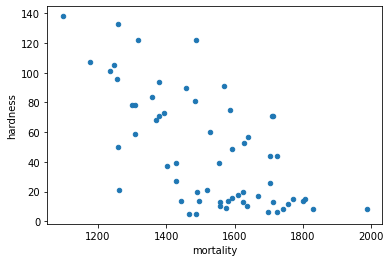

In [190]:
#строим точечный график
df.plot(kind='scatter', x='mortality', y='hardness')

In [192]:
#коэф. корреляции Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [193]:
#коэф. корреляции Спирмена
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


оба метода вычисления корреляции дали почти одинаковые значения: -0.65 и -0.63. Смертность и жесткость водымв определенной степени отрицательно коррелируют между собой (при увеличении одного, увеличивается второе)

In [194]:
#построим модель линейной регрессии

X = df[['mortality']]
y = df['hardness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #делим данные на тестовые и тренировочные

In [195]:
model = LinearRegression() #инициализируем модель
model.fit(X_train, y_train)  #обучаем модель на тренировочных данных

LinearRegression()

In [196]:
model.coef_ 

array([-0.12670202])

In [197]:
y_pred = model.predict(X_test) #прогноз на тестовых данных

In [198]:
model.score(X_test, y_test) #коэффициент детерминации

0.4948982822876835

Коэффициент детерминации находится на достаточно низком уровне (0.49), в текущем виде модель не совсем пригодна для прогноза будущих значений. 

In [199]:
#график остатков
residual = (y_test - y_pred)

Text(0, 0.5, 'residuals')

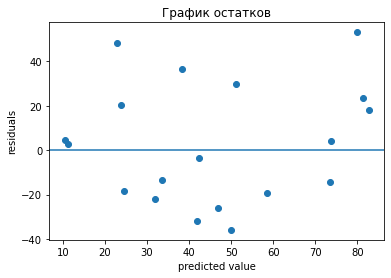

In [235]:
plt.scatter(y_pred, residual)
plt.axhline(y=0)
plt.title('График остатков')
plt.xlabel('predicted value')
plt.ylabel('residuals')

#### Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

**Южные города**

In [201]:
#данные по южным городам
df_south = df[df['location']=='South'] 
df_south.describe()

,Unnamed: 0,mortality,hardness
count,26.000000,26.000000,26.000000
mean,31.346154,1376.807692,69.769231
std,18.742342,140.269175,40.360682
min,1.000000,1096.000000,5.000000
25%,14.250000,1259.250000,40.250000
50%,33.500000,1364.000000,75.500000
75%,46.500000,1485.750000,99.750000
max,60.000000,1627.000000,138.000000


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

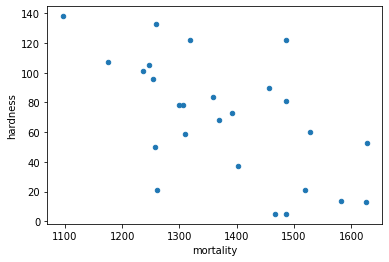

In [202]:
#строим точечный график
df_south.plot(kind='scatter', x='mortality', y='hardness')

In [203]:
#коэф. корреляции Пирсона
df_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [204]:
#коэф. корреляции Спирмена
df_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


Оба метода вычисления корреляции для южных городов вывели значение на уровне -0.6, что немного выше значения, найденного для общей выборки

In [241]:
#построим модель линейной регрессии

X = df_south[['mortality']]
y = df_south['hardness']
X_train_south, X_test_south, y_train_south, y_test_south = train_test_split(
    X, y, test_size=0.30, random_state=42) #делим данные на тестовые и тренировочные

In [237]:
model_south = LinearRegression() #инициализируем модель
model_south.fit(X_train_south, y_train_south)  #обучаем модель на тренировочных данных

LinearRegression()

In [238]:
model_south.coef_ 

array([-0.18112812])

In [239]:
y_pred_south = model_south.predict(X_test_south) #прогноз на тестовых данных

In [242]:
model_south.score(X_test_south, y_test_south) #коэффициент детерминации

-0.05226615794483824

Коэффициент детерминации получился меньше нуля, модель непригодна для использования 

In [210]:
#график остатков
residual_south = (y_test_south - y_pred_south)

Text(0, 0.5, 'residuals')

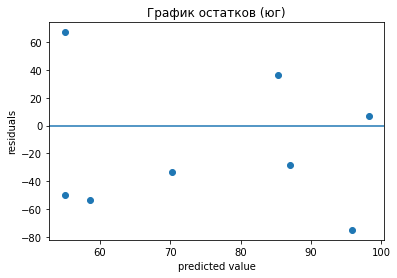

In [211]:
plt.scatter(y_pred_south, residual_south)
plt.axhline(y=0)
plt.title('График остатков (юг)')
plt.xlabel('predicted value')
plt.ylabel('residuals')

**Северные города**

In [212]:
df_north = df[df['location']=='North'] #данные по северным городам
df_north.describe()

,Unnamed: 0,mortality,hardness
count,35.000000,35.000000,35.000000
mean,30.742857,1633.600000,30.400000
std,17.254740,136.936911,26.134494
min,2.000000,1378.000000,6.000000
25%,17.500000,1557.500000,12.500000
50%,30.000000,1637.000000,17.000000
75%,45.500000,1718.000000,44.000000
max,61.000000,1987.000000,94.000000


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

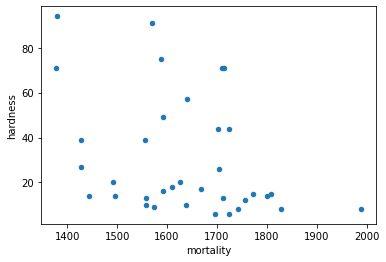

In [213]:
#строим точечный график
df_north.plot(kind='scatter', x='mortality', y='hardness')

In [214]:
#коэф. корреляции Пирсона
df_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [215]:
#коэф. корреляции Спирмена
df_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


Значения корреляции для северных городов, найденные 2мя разными способами, немного различаются: -0.36 (Пирсон) и -0.4 (Спирмен). В любом случае, это ниже значений, найденных по общей выборке и отдельно по южным городам. Следовательно, в южных городах связь между смертностью и жесткостью воды сильнее, что вполне очевидно, поскольку средняя жесткость воды на юге более чем в 2 раза выше, чем на севере (30 и 70 соответственно). Это может быть связано с разными источниками поступления воды (поверхностные или грунтовые воды).

In [216]:
#построим модель линейной регрессии

X = df_north[['mortality']]
y = df_north['hardness']
X_train_north, X_test_north, y_train_north, y_test_north = train_test_split(
    X, y, test_size=0.30, random_state=42) #делим данные на тестовые и тренировочные

In [217]:
model_north = LinearRegression() #инициализируем модель
model_north.fit(X_train_north, y_train_north)  #обучаем модель на тренировочных данных

LinearRegression()

In [218]:
model_north.coef_ 

array([-0.09774218])

In [219]:
y_pred_north = model_north.predict(X_test_north) #прогноз на тестовых данных

In [220]:
model_north.score(X_test_north, y_test_north) #коэффициент детерминации

-0.34863672627416764

Коэффициент детерминации получился меньше нуля, модель непригодна для использования 

In [243]:
#график остатков
residual_north = (y_test_north - y_pred_north)

Text(0, 0.5, 'residuals')

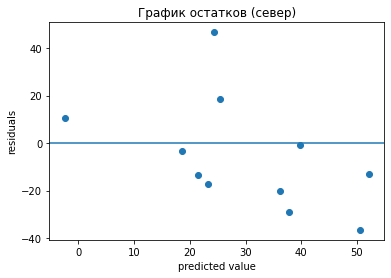

In [244]:
plt.scatter(y_pred_north, residual_north)
plt.axhline(y=0)
plt.title('График остатков (север)')
plt.xlabel('predicted value')
plt.ylabel('residuals')